# Superstore Data Analysis

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.

You can even take this a step further and try and build a Regression model to predict Sales or Profit.

Go crazy with the dataset, but also make sure to provide some business insights to improve.
https://www.kaggle.com/datasets/vivek468/superstore-dataset-final




## Breakdown of my data analysis: 

1. Total number of orders from each region and state
2. Total number of orders for each product category
3. Total number of orders for each customer segment
4. Distribution of sales and profits
5. Sales and profits per region and state
6. Shipping modes most preferred
7. Sales and profits per year and month
8. Average sales and profits over total time period


### Understanding the dataset:

It is important to get some basic familiarity with the dataset. Some information I like to have before deciding on a plan to approach the dataset is:

1. number of rows and columns
2. column titles
3. basic statistics of the dataframe which can be gained from df.describe()
4. since there are 20 columns I find the unique values in the columns I wish to start with, so I can decide the columns to drop to get a cleaner dataset. Finding the unique values also helps plan how to analyze the data and how to split the data through groupby.


In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



df=pd.read_csv('C:\python codes\Sample - Superstore.csv', encoding='windows-1252')

#df.info()
#df.describe()
#df.columns

df.head(5)



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [92]:
df.Country.unique()


array(['United States'], dtype=object)

**The only country in this Country column is United States so we can clean up the dataset by dropping this column**

In [93]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [94]:
df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [95]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [96]:
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [97]:
df['Order ID'].nunique()

5009

In [98]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [99]:
store = df.drop(columns = 'Country')
store['Order Date'] = pd.to_datetime(store['Order Date'])
store['Ship Date'] = pd.to_datetime(store['Ship Date'])

store['Month'] = store['Order Date'].dt.month
store['Year'] = store['Order Date'].dt.year
store.head(5) 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015


In [100]:
store.State.nunique()


49

In [132]:
store.Year.unique()

array([2016, 2015, 2014, 2017], dtype=int64)

## Basic information about the dataset:

1. There are three shipping modes used by the customers:
    
   - Second class
   - Standard class
   - First Class
   - Same Day

2. The orders lie in three product categories:

   - Furniture
   - Office Supplies
   - Technology
   
3. The orders come from four U.S. regions:
   
   - South
   - West
   - Central
   - East
   
4. There are three types of customers that order from the superstore:
   
   - Consumer
   - Corporate
   - Home Office
   

This information gives a good starting point of how the data can be split to find different trends. More information will now be layered onto this to refine the data analysis.

In [101]:
store_region = store.groupby(['Region', 'State'])['Quantity'].sum().reset_index()

In [102]:
store_region.head(10)

,Region,State,Quantity
0,Central,Illinois,1845
1,Central,Indiana,578
2,Central,Iowa,112
3,Central,Kansas,74
4,Central,Michigan,946
5,Central,Minnesota,331
6,Central,Missouri,252
7,Central,Nebraska,136
8,Central,North Dakota,30
9,Central,Oklahoma,247


###  Analyzing total number of orders from each region and state

I have created a smaller dataset by grouping the data by Region and State to get the total amount of orders (taken from the sum of quantities each customer ordered). Now my dataset shows the total quantity of orders from each state. 

Let's see how a barchart can help us visualize the data. I choose to visualize the top ten states in terms of orders.

In [103]:
#pivoted_store = store_region.pivot(columns = 'Region' , index = 'State', values = 'Quantity')

In [104]:
#pivoted_store

In [105]:
store_region_sorted = store_region.sort_values('Quantity', ascending = False)

store_region_sorted.reset_index(drop = True,inplace = True)

store_region_sorted.head(10)

,Region,State,Quantity
0,West,California,7667
1,East,New York,4224
2,Central,Texas,3724
3,East,Pennsylvania,2153
4,West,Washington,1883
5,Central,Illinois,1845
6,East,Ohio,1759
7,South,Florida,1379
8,South,North Carolina,983
9,Central,Michigan,946


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Pennsylvania'),
  Text(4, 0, 'Washington'),
  Text(5, 0, 'Illinois'),
  Text(6, 0, 'Ohio'),
  Text(7, 0, 'Florida'),
  Text(8, 0, 'North Carolina'),
  Text(9, 0, 'Michigan')])

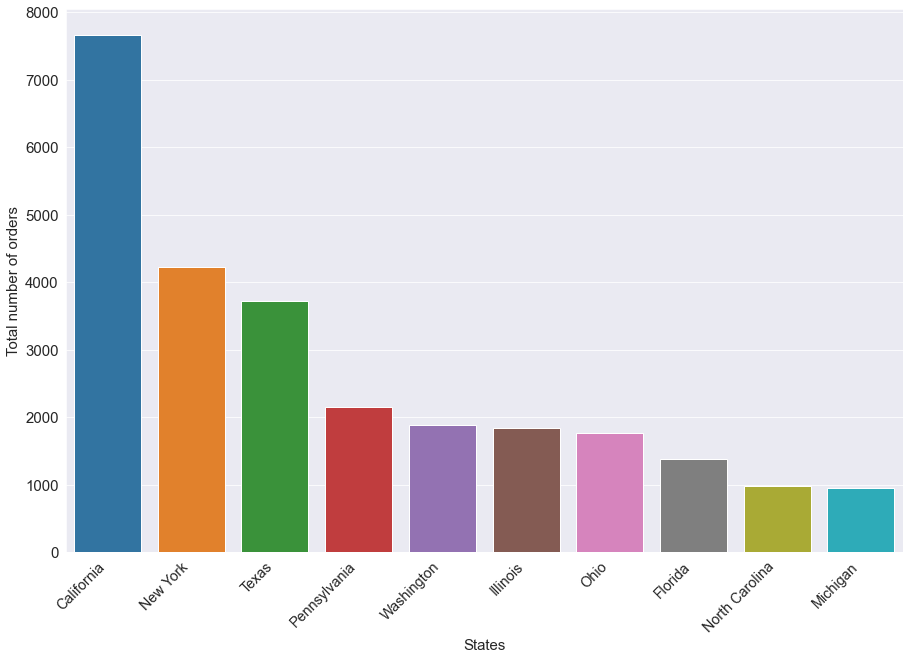

In [106]:
sns.set_style('darkgrid')

plt.figure(figsize = (15,10))
ax = sns.barplot(x = store_region_sorted['State'][:10], y = store_region_sorted['Quantity'][:10], data = store_region_sorted)
ax.set_xlabel('States', fontdict = {'size': 15})
ax.set_ylabel('Total number of orders', fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize = 15)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

### Findings:

When all the states regardless of region were analyzed we can see that the top three states in terms of number of orders from the superstore are

California(East) - 7667 orders
New York (West) - 4224 orders
Texas (Central) - 3724 orders

Interestingly these three states are in different regions. So the superstore has alot of customers in the three regions but we can confirm this by analyzing the data by region to get an overall picture of how the superstore performs per region

In [107]:
by_region = store.groupby('Region').Quantity.sum().reset_index()

by_region

,Region,Quantity
0,Central,8780
1,East,10618
2,South,6209
3,West,12266


When analyzing how consumers shop from the superstore according to region, I decided to get the total quantities of orders per region which gives a simple view of how the store is performing in terms of region. We can see that the store gets most of its orders from the West region. In the west region it gets most of its orders from California.

The East region is in a close second where New York leads in terms of orders from the superstore.
We can exhibit this pattern in a graph.

<AxesSubplot:xlabel='Region', ylabel='Quantity'>

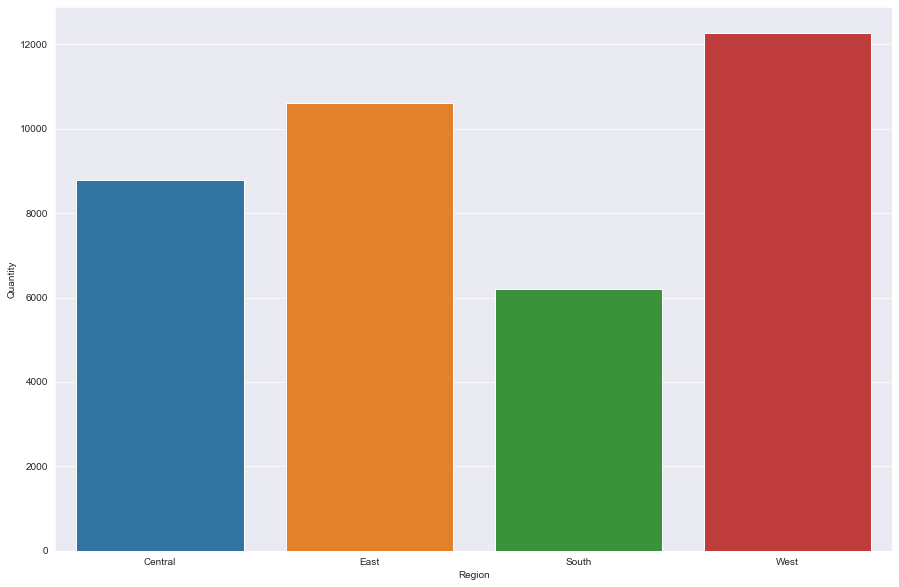

In [108]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))
sns.barplot(x = 'Region', y = 'Quantity', data = by_region, estimator = np.mean)

Next step is to see which states per region order the most from the superstore. 

For this we will split the dataframe per region and create new dataframes for each region. The we will plot barplots for each region to see the ordering trend per state

In [109]:
states_central = store.loc[store['Region'] == 'Central']

In [110]:
#states_central.head(10)

In [111]:
states_central.Region.unique()

array(['Central'], dtype=object)

In [112]:
grouped_states_central = states_central.groupby('State').Quantity.sum().sort_values(ascending = False).reset_index()
grouped_states_central

,State,Quantity
0,Texas,3724
1,Illinois,1845
2,Michigan,946
3,Indiana,578
4,Wisconsin,463
5,Minnesota,331
6,Missouri,252
7,Oklahoma,247
8,Nebraska,136
9,Iowa,112


sns.set_style('darkgrid')
plt.figure(figsize = (20,10)) #this helps to increase size of barplot so xticks donot overlap
font = {'family': 'serif',
        'color': '#004467',
        'weight': 'normal',
        'size': 16}
grph = sns.barplot(x = "State", y = 'Quantity', data = grouped_states_central )
grph.set_ylabel('num of orders',fontdict={'size': 13, 'family': 'serif'})
grph.set_xlabel('State', fontdict={'size': 13, 'family': 'serif'})
grph.set_title('Number of orders by state (Central Region)', fontdict = font)
grph.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)




In the central region the superstore receives most of its orders from Texas and we can see the significant difference in Texas orders compared to other states. We also saw before in the grouped dataset: store_region, that Texas is responsible for the 3rd highest number of orders from the superstore. So it is worth focusing on and targeting this state. 

Illinois can also be targetted to increase sales in that state. 


*Now the next step is to see consumers of which particular cities in Texas order the most from the superstore. 

**Also we need to see which type of consumers ordered the most from these cities. this will help customize marketing strategies based on the consumer type: individual consumer, corporate, home office.

**We can also utilize line graphs to see trends in changes in number of orders over the timeline of the datasetfor each of these cities or states to see if orders increased because that way we can judge whether the superstore is gaining popularity in a particular city with sales increasing.


In [113]:
states_west = store.loc[store['Region'] == 'West']

#states_west.Region.unique()


grouped_states_west = states_west.groupby('State').Quantity.sum().sort_values(ascending = False).reset_index()
grouped_states_west

,State,Quantity
0,California,7667
1,Washington,1883
2,Arizona,862
3,Colorado,693
4,Oregon,499
5,Utah,219
6,Nevada,168
7,New Mexico,151
8,Idaho,64
9,Montana,56


sns.set_style('darkgrid')
plt.figure(figsize = (20,10)) #this helps to increase size of barplot so xticks donot overlap
font = {'family': 'serif',
        'color': '#004467',
        'weight': 'normal',
        'size': 16}
grph = sns.barplot(x = "State", y = 'Quantity', data = grouped_states_west )
grph.set_ylabel('num of orders',fontdict={'size': 13, 'family': 'serif'})
grph.set_xlabel('State', fontdict={'size': 13, 'family': 'serif'})
grph.set_title('Number of orders by state (West Region)', fontdict = font)
grph.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

The superstore got 7667 orders from California so it has a huge potential to grow its consumers in this state. Although again we need to see what kind of consumers are ordering from this state and which particular cities is the superstore receiving most of its orders from.

There were only 4 orders from Wyoming so the superstore can afford to ignore this state when focusing on its targets for its marketing strategies.

In [114]:
states_east= store.loc[store['Region'] == 'East']

grouped_states_east = states_east.groupby('State').Quantity.sum().sort_values(ascending = False).reset_index()
grouped_states_east

                       

,State,Quantity
0,New York,4224
1,Pennsylvania,2153
2,Ohio,1759
3,Massachusetts,491
4,New Jersey,454
5,Maryland,420
6,Delaware,367
7,Connecticut,281
8,Rhode Island,199
9,New Hampshire,127


sns.set_style('darkgrid')
sns.color_palette('flare', as_cmap = True)
plt.figure(figsize = (20,10)) #this helps to increase size of barplot so xticks donot overlap
font = {'family': 'serif',
        'color': '#004467',
        'weight': 'normal',
        'size': 16}
grph = sns.barplot(x = "State", y = 'Quantity', data = grouped_states_east )
grph.set_ylabel('num of orders',fontdict={'size': 13, 'family': 'serif'})
grph.set_xlabel('State', fontdict={'size': 13, 'family': 'serif'})
grph.set_title('Number of orders by state (East Region)', fontdict = font)
grph.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

In the East region, the superstore gets the highest amount of orders from New York (4224!). The city also ranks 2nd in terms of total quantity of orders from the superstore per city. 

Pennsylvania and Ohio also have a good number of consumers so the three cities need to be targetted.

The superstore can afford to drop its marketing efforts in New Hampshire, Vermont, District of Columbia, Maine and West Virginia


In [115]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Analyzing number of orders from each product category

In [116]:
store_products = store.groupby(['Category']).Quantity.sum().sort_values(ascending = False).reset_index()

store_products

,Category,Quantity
0,Office Supplies,22906
1,Furniture,8028
2,Technology,6939


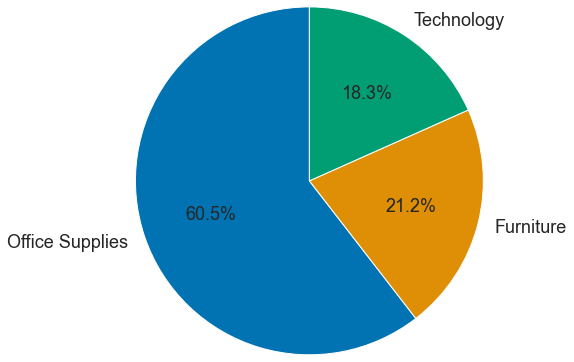

In [117]:
colors = sns.color_palette('colorblind')[0:3]
textprops = {'fontsize': 18}

plt.pie(store_products['Quantity'], labels = store_products['Category'], colors = colors, autopct='%.1f%%', radius = 2.0, 
        startangle = 90, textprops = textprops )

plt.show()

### Findings:

Office supplies have been ordered the most from the store. 
There is a significant difference between the orders in this product category and the other two categories. 
So at this point should I assume that most of the consumers are either corporate or home office? 
Not at all, when I have my statistics to find me the answer to this question:

Onwards to types of consumers

### Total number of orders for each customer segment

In [118]:
consumers = store.groupby('Segment')['Quantity'].sum().sort_values(ascending = False).reset_index()
consumers

,Segment,Quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


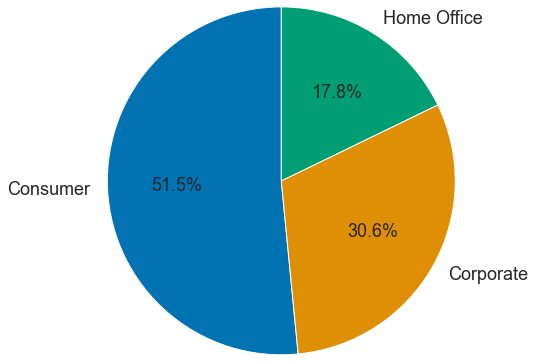

In [119]:
colors = sns.color_palette('colorblind')[0:3]
textprops = {'fontsize': 18}

plt.pie(consumers['Quantity'], labels = consumers['Segment'], colors = colors, autopct='%.1f%%', radius = 2.0, 
        startangle = 90, textprops = textprops )

plt.show()

### Findings:

Most of orders the store gets are from are consumers. 

They make up half of the customers whereas Corporate makes around 30 percent of the customers. 

So, even though office supplies are the most popular product category they are not all being bought by offices. 

## Distribution of Sales and Profits

C:\Users\riaz7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\riaz7\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


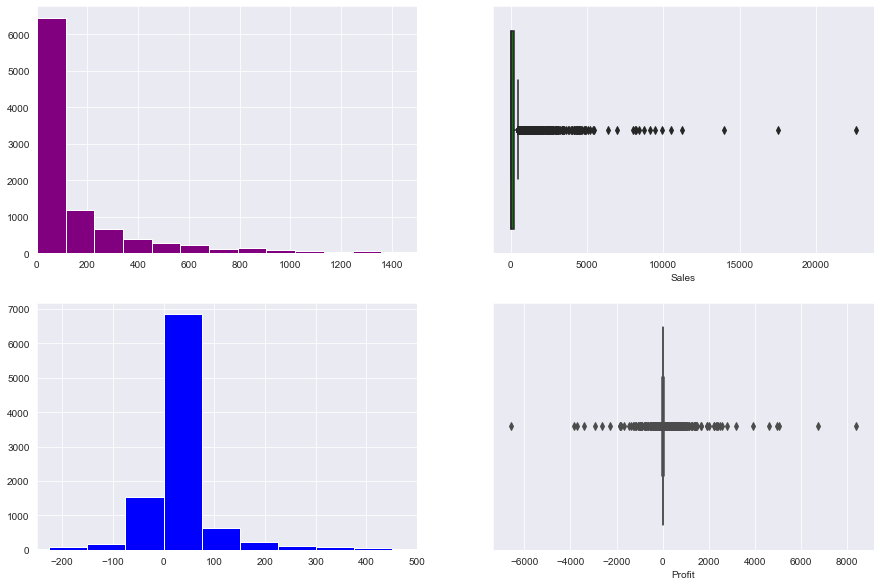

In [200]:
distribution_sales_profits = store[['Sales', 'Profit']]

plt.figure(figsize = [15, 10] )

plt.subplot(2,2,1)
plt.hist(distribution_sales_profits['Sales'], bins = 200, color = 'purple')
plt.xlim(0, 1500)

plt.subplot(2,2,2)
sns.boxplot(distribution_sales_profits['Sales'], color = 'green')

plt.subplot(2,2,3)
plt.hist(distribution_sales_profits['Profit'], bins = 200, color = 'blue')
plt.xlim(-250, 500)

plt.subplot(2,2,4)
sns.boxplot(distribution_sales_profits['Profit'], color = 'magenta')
plt.show()

### Distribution analysis

1. sales distribution shows a right skewed histogram which means that

## Analyzing total profits per region, state, product, consumer

In [120]:
profits_byregion =store.groupby('Region').Profit.sum().sort_values(ascending = False).reset_index()
profits_byregion['Profit'] = profits_byregion['Profit'].round(decimals = 2) #rounds the profit to 2 decimel places
profits_byregion

,Region,Profit
0,West,108418.45
1,East,91522.78
2,South,46749.43
3,Central,39706.36


(array([0, 1, 2, 3]),
 [Text(0, 0, 'West'),
  Text(1, 0, 'East'),
  Text(2, 0, 'South'),
  Text(3, 0, 'Central')])

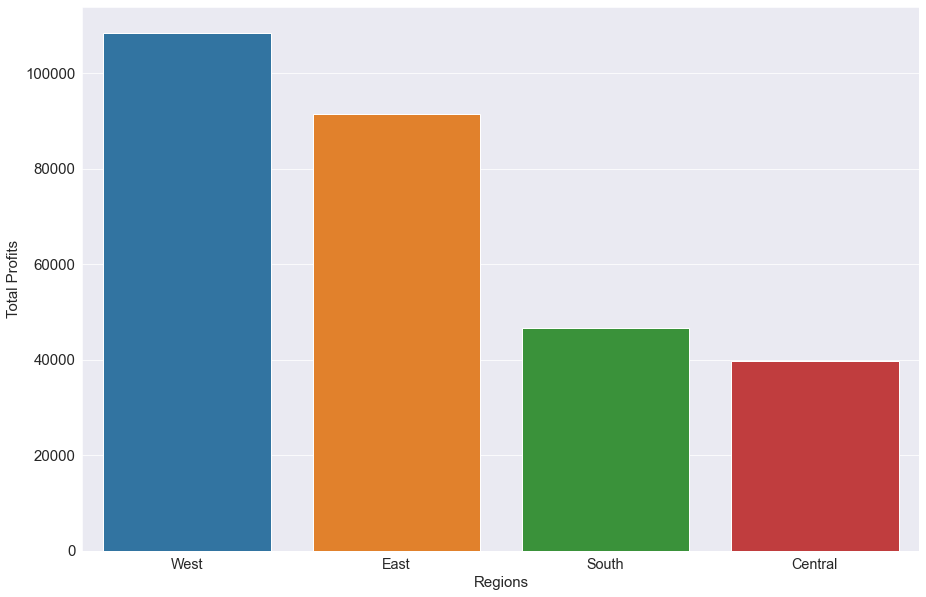

In [121]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Region', y = 'Profit', data= profits_byregion)

ax.set_xlabel('Regions', fontdict = {'size': 15})
ax.set_ylabel("Total Profits", fontdict = {'size': 15})

ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=0, 
    fontweight='light',
    fontsize='x-large'  
)

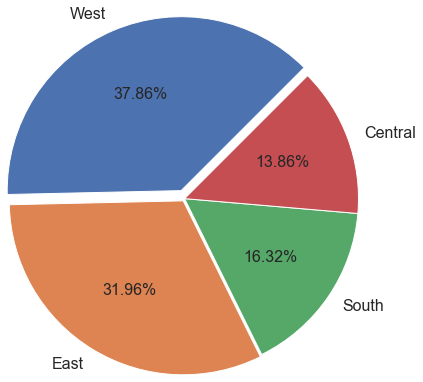

In [122]:
colors = sns.color_palette('deep')[0:4]
textprops = {'fontsize': 16}
explode = [0.1,0.03,0,0]
#colors = ["b", 'r','y','g']
plt.pie(profits_byregion['Profit'], labels = profits_byregion['Region'], colors = colors, autopct='%.2f%%', radius = 2.0, 
        startangle = 45, textprops = textprops, explode = explode )

plt.show()

### Findings:

The West and East region are the biggest contributors to the total profits so these regions definitely hold promise for profit growth

The South region, even though stood last in terms of number of orders, contributes around 16 percent of total profits. This is interesting because it means even though number of orders were lesser, they were bigger orders in terms of dollar amount. So the southern region cannot be ignored. 

However it is important at this point to see which specific states and cities within the states contribute the most to the total profits

Sales targets can be set according to total sales in different regions



In [123]:
profits_bystate = store.groupby(['Region', 'State']).agg({'Profit':'sum', 'Sales': 'sum'}).reset_index()

#profits_bystate = store.groupby(['Region', 'State']).Profit.sum().sort_values(ascending = False).reset_index()

profits_bystate.head(10)

profits_bystate.loc[profits_bystate['State'] == 'California']

,Region,State,Profit,Sales
39,West,California,76381.3871,457687.6315


In [124]:
profits_bystate = profits_bystate.sort_values('Profit', ascending = False).reset_index(drop = True)

profits_bystate['Profit Margin'] = profits_bystate['Profit']/profits_bystate['Sales'] * 100
profits_bystate['Profit Margin'] = profits_bystate['Profit Margin'].round(decimals = 1)


profits_bystate.head(10)

,Region,State,Profit,Sales,Profit Margin
0,West,California,76381.3871,457687.6315,16.7
1,East,New York,74038.5486,310876.2710,23.8
2,West,Washington,33402.6517,138641.2700,24.1
3,Central,Michigan,24463.1876,76269.6140,32.1
4,South,Virginia,18597.9504,70636.7200,26.3
5,Central,Indiana,18382.9363,53555.3600,34.3
6,South,Georgia,16250.0433,49095.8400,33.1
7,South,Kentucky,11199.6966,36591.7500,30.6
8,Central,Minnesota,10823.1874,29863.1500,36.2
9,East,Delaware,9977.3748,27451.0690,36.3


In [125]:
profits_top_ten_states = profits_bystate.iloc[:10]

profits_top_ten_states

,Region,State,Profit,Sales,Profit Margin
0,West,California,76381.3871,457687.6315,16.7
1,East,New York,74038.5486,310876.2710,23.8
2,West,Washington,33402.6517,138641.2700,24.1
3,Central,Michigan,24463.1876,76269.6140,32.1
4,South,Virginia,18597.9504,70636.7200,26.3
5,Central,Indiana,18382.9363,53555.3600,34.3
6,South,Georgia,16250.0433,49095.8400,33.1
7,South,Kentucky,11199.6966,36591.7500,30.6
8,Central,Minnesota,10823.1874,29863.1500,36.2
9,East,Delaware,9977.3748,27451.0690,36.3


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

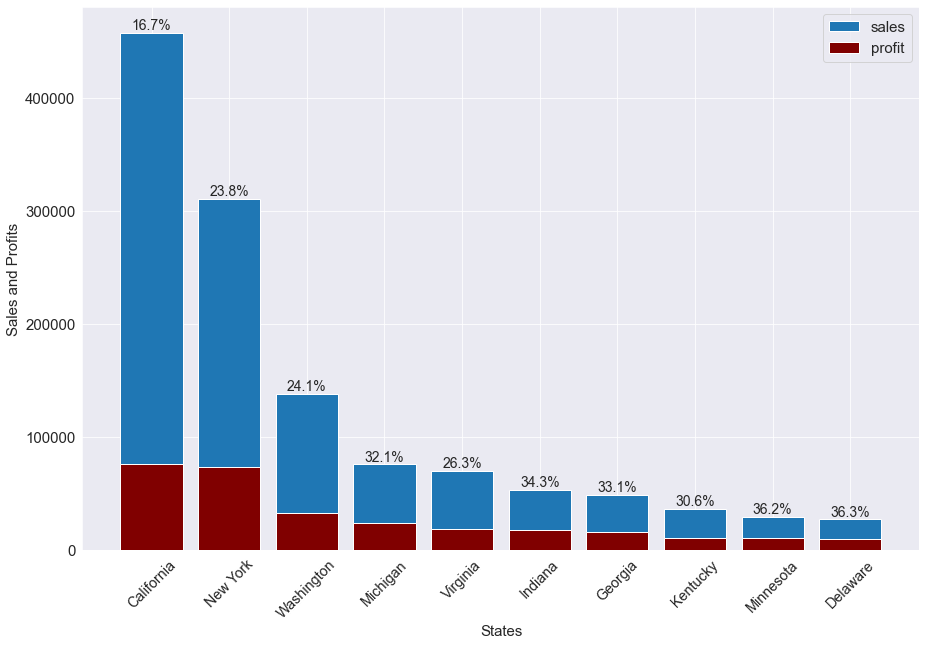

In [126]:
plt.figure(figsize = (15,10))


ax = plt.subplot()
ax.bar(profits_top_ten_states["State"], profits_top_ten_states["Sales"], label = 'sales')
ax.bar(profits_top_ten_states["State"], profits_top_ten_states["Profit"], color="maroon", label = 'profit')

ax.set_xlabel('States', fontdict = {'size': 15})
ax.set_ylabel("Sales and Profits", fontdict = {'size': 15})

labels = [f"{i}%" for i in profits_top_ten_states["Profit Margin"]] #this adds a custom label
rects = ax.patches

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom", fontsize = 14
    )

        
plt.legend(loc = 'upper right', fontsize = 15)

ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=45, 
    fontweight='light',
    fontsize='x-large'  
)




### Findings:

The stacked barplot shows that California state gives the highest sales to the superstore, however the profits coming in from this state are not that higher compared to New York.

The percentages on top of each plot show the profit margin (profits/sales). It is an important value which gives the profit margin. 

California has the lowest profit margin even though it ranks highest in terms of number of orders and total sales dollar value. 

New York has almost 100,000 lesser sales revenue yet it gives a higher profit. 

This could be for a number of reasons:
 - the cost of doing business in California: taxes, shipping, employee wages, freight cost, maintenance expenses, insurance, advertising, regional administrative expenses, payroll taxes
 
 - change in mix of sales - are lower margin sales higher than higher margin sales in California
 
 - expectations of consumers (more discounts given, more expensive marketing efforts)


profits_byproduct = store.groupby(['Category', 'Sub-Category']).agg({'Profit':'sum', 'Sales': 'sum', 'Discount': 'mean'}).reset_index()


profits_byproduct = profits_byproduct.sort_values('Sales', ascending = False)

profits_byproduct


In [127]:
california = store.loc[store['State'] == 'California']

california

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,6,2016
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,6,2014
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,6,2014
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,6,2014
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,...,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,9987,CA-2016-125794,2016-09-29,2016-10-03,Standard Class,ML-17410,Maris LaWare,Consumer,Los Angeles,California,...,TEC-AC-10003399,Technology,Accessories,Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...,36.240,1,0.0,15.2208,9,2016
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332,2,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932,2,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200,2,2017


In [128]:
california_cities = california.groupby(['City', 'Category', 'Sub-Category']).agg({'Quantity': 'sum', 'Profit':'sum', 'Sales': 'sum'}).reset_index()
california_cities = california_cities.sort_values('Quantity', ascending  = False).reset_index(drop = True)
california_cities.head(15)

,City,Category,Sub-Category,Quantity,Profit,Sales
0,Los Angeles,Office Supplies,Paper,454,3022.0118,6346.400
1,Los Angeles,Office Supplies,Binders,360,3411.7499,9761.224
2,Los Angeles,Technology,Phones,297,2582.1462,29503.032
3,San Francisco,Office Supplies,Binders,291,2258.5381,6559.512
4,San Francisco,Office Supplies,Paper,282,2355.7534,4910.330
5,Los Angeles,Furniture,Furnishings,256,2027.1744,6787.360
6,Los Angeles,Office Supplies,Art,254,532.8627,1828.110
7,Los Angeles,Office Supplies,Storage,241,2892.6561,18789.820
8,Los Angeles,Technology,Accessories,236,5667.2927,18463.050
9,San Francisco,Furniture,Furnishings,183,1031.0404,3415.680


### Analyzing which shipping modes are most frequently used

In [129]:
shipping_modes = store.groupby(['Ship Mode']).Quantity.sum().sort_values(ascending = False).reset_index()
shipping_modes

,Ship Mode,Quantity
0,Standard Class,22797
1,Second Class,7423
2,First Class,5693
3,Same Day,1960


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Standard Class'),
  Text(1, 0, 'Second Class'),
  Text(2, 0, 'First Class'),
  Text(3, 0, 'Same Day')])

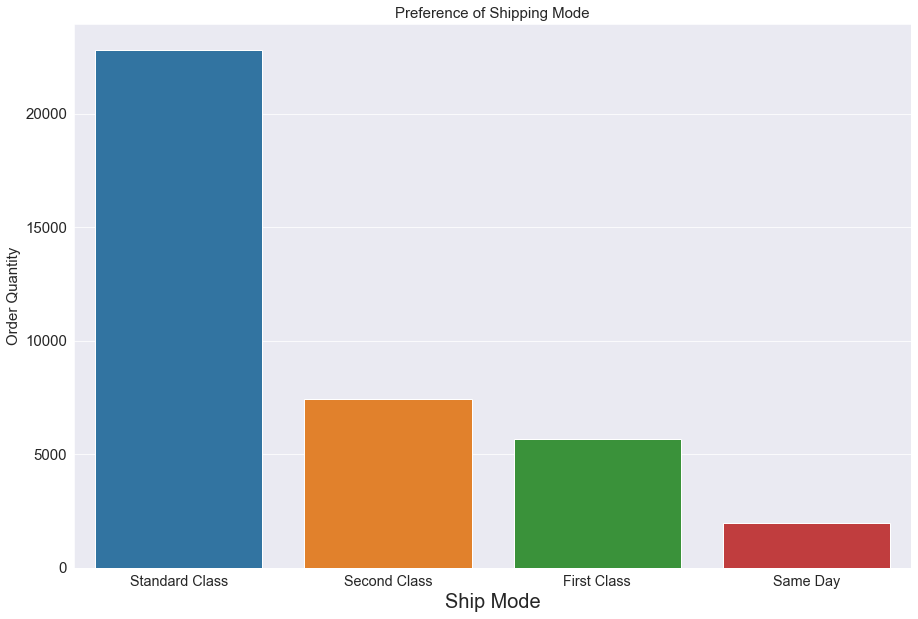

In [130]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Ship Mode', y = 'Quantity', data= shipping_modes)

ax.set_xlabel('Ship Mode', fontdict = {'size': 20})
ax.set_ylabel("Order Quantity", fontdict = {'size': 15})
ax.set_title("Preference of Shipping Mode", fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=0, 
    fontweight='light',
    fontsize='x-large'  
)

### Time series analysis of sales and profits:

1. Total number of sales each year
2. Total and Avg number of sales per month over the years
3. Trend of total profit over the years



In [164]:
yearly_sales = store.groupby('Year').agg({'Profit':'sum', 'Sales': 'sum'}).reset_index()

yearly_sales

,Year,Profit,Sales
0,2014,49543.9741,484247.4981
1,2015,61618.6037,470532.5090
2,2016,81795.1743,609205.5980
3,2017,93439.2696,733215.2552


(array([0, 1, 2, 3]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2015'),
  Text(2, 0, '2016'),
  Text(3, 0, '2017')])

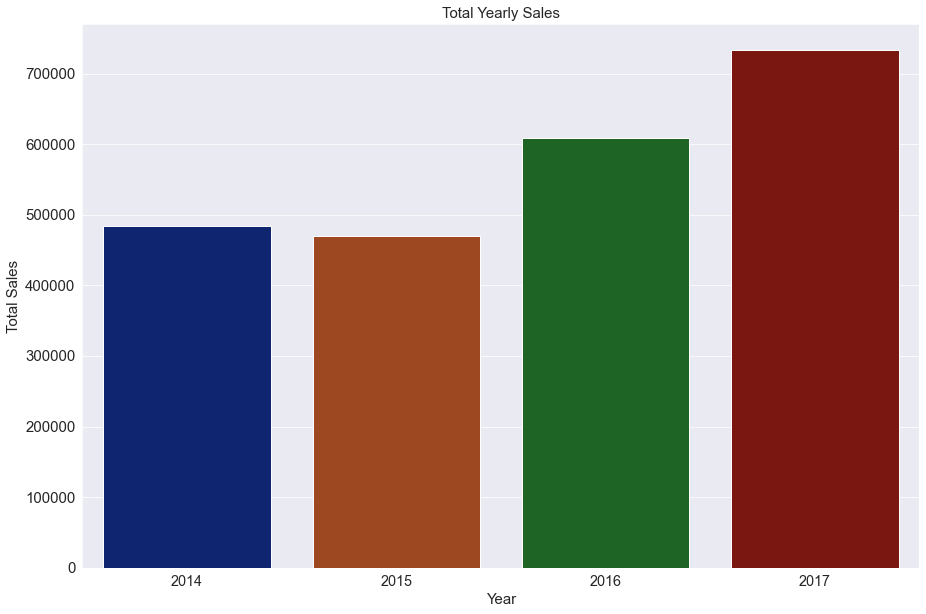

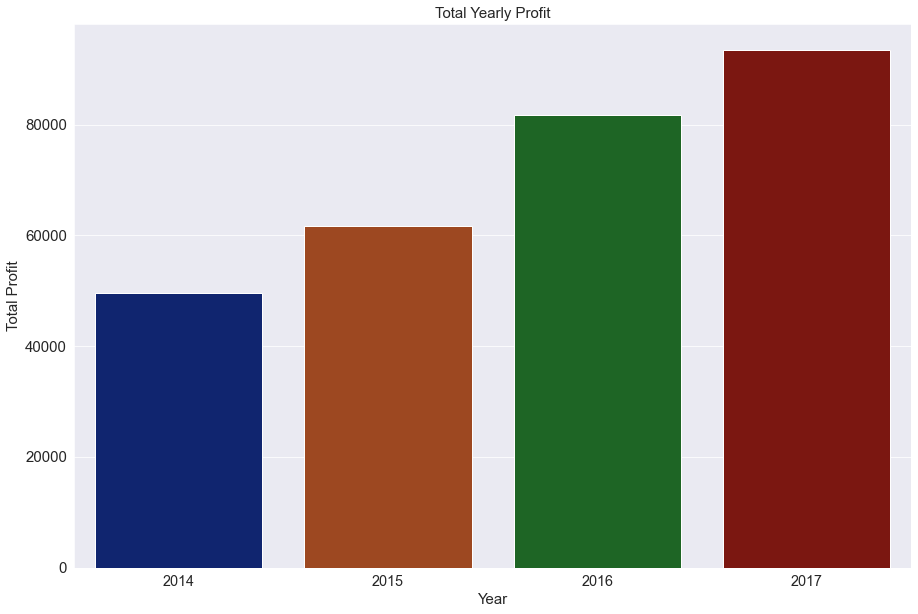

In [171]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Year', y = 'Sales' ,palette = 'dark', data= yearly_sales)

ax.set_xlabel('Year', fontdict = {'size': 15})
ax.set_ylabel("Total Sales", fontdict = {'size': 15})
ax.set_title("Total Yearly Sales", fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=0, 
    fontweight='light',
    fontsize='x-large'  
)



sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Year', y = 'Profit' ,palette = 'dark', data= yearly_sales)

ax.set_xlabel('Year', fontdict = {'size': 15})
ax.set_ylabel("Total Profit", fontdict = {'size': 15})
ax.set_title("Total Yearly Profit", fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=0, 
    fontweight='light',
    fontsize='x-large'  
)

In [151]:
monthly_sales = store.groupby('Month').Sales.sum().sort_values(ascending = False).reset_index()
monthly_sales = monthly_sales.sort_values('Month').reset_index(drop = True)
monthly_sales['Months'] = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales

,Month,Sales,Months
0,1,94924.8356,Jan
1,2,59751.2514,Feb
2,3,205005.4888,March
3,4,137762.1286,April
4,5,155028.8117,May
5,6,152718.6793,June
6,7,147238.0970,July
7,8,159044.0630,Aug
8,9,307649.9457,Sep
9,10,200322.9847,Oct


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

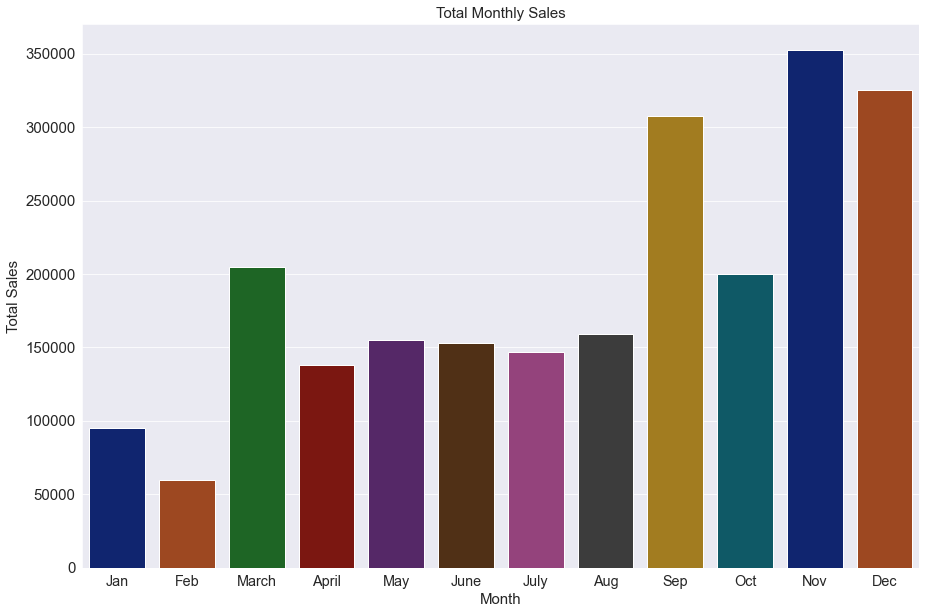

In [163]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Months', y = 'Sales',palette = 'dark', data= monthly_sales)

ax.set_xlabel('Month', fontdict = {'size': 15})
ax.set_ylabel("Total Sales", fontdict = {'size': 15})
ax.set_title("Total Monthly Sales", fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=0, 
    fontweight='light',
    fontsize='x-large'  
)

#### September, November and December are the three months that give the highest sales whereas the lowest sales are seen in the months of January and February

### Sales and profits by product category

In [172]:
profit_by_category = store.groupby('Category').Profit.sum().sort_values(ascending = True).reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


(array([0, 1, 2]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

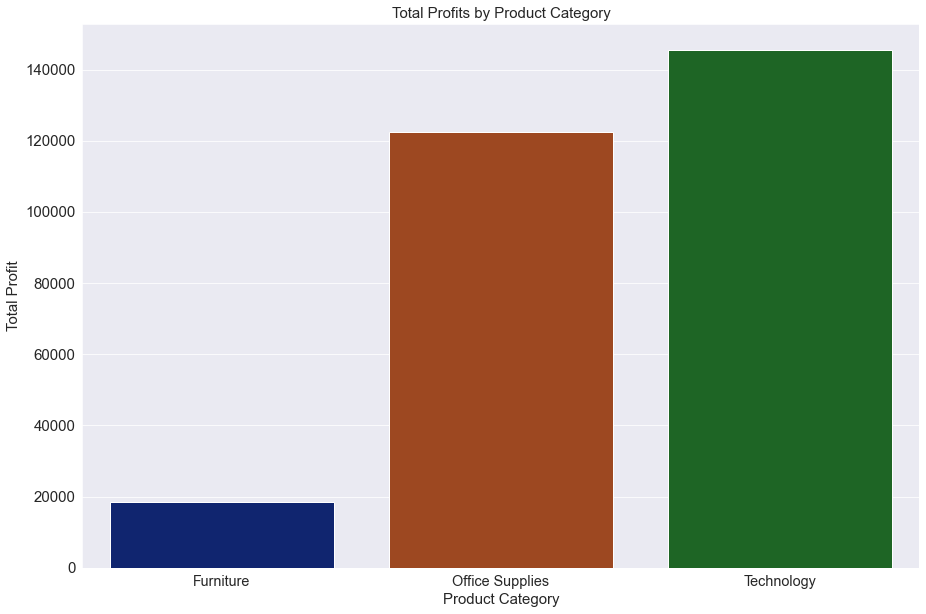

In [173]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Category', y = 'Profit',palette = 'dark', data= profit_by_category)

ax.set_xlabel('Product Category', fontdict = {'size': 15})
ax.set_ylabel("Total Profit", fontdict = {'size': 15})
ax.set_title("Total Profits by Product Category", fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=0, 
    fontweight='light',
    fontsize='x-large'  
)

In [175]:
sales_by_category = store.groupby('Category').Sales.sum().sort_values(ascending = True).reset_index()

(array([0, 1, 2]),
 [Text(0, 0, 'Office Supplies'),
  Text(1, 0, 'Furniture'),
  Text(2, 0, 'Technology')])

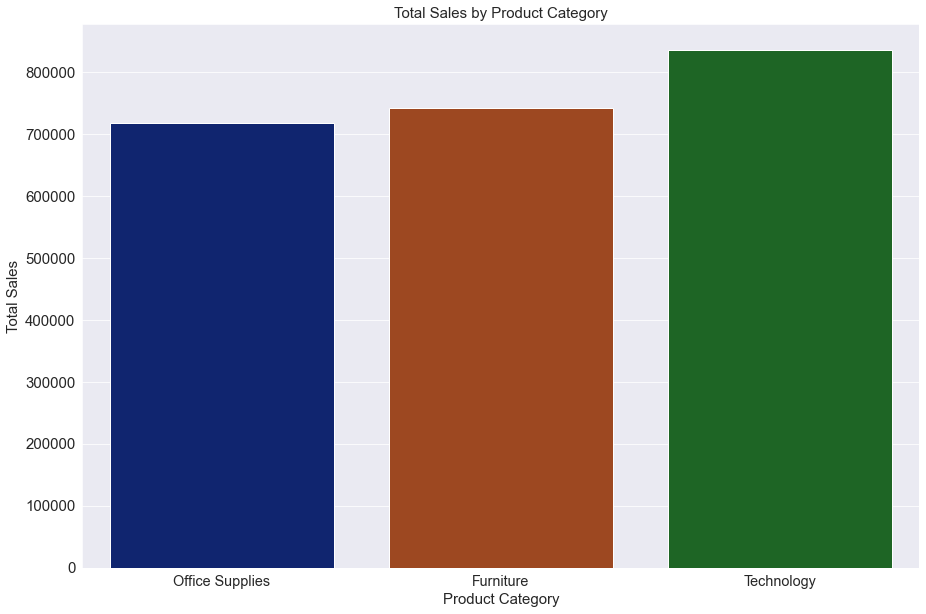

In [176]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Category', y = 'Sales',palette = 'dark', data= sales_by_category)

ax.set_xlabel('Product Category', fontdict = {'size': 15})
ax.set_ylabel("Total Sales", fontdict = {'size': 15})
ax.set_title("Total Sales by Product Category", fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=0, 
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Copiers'),
  Text(1, 0, 'Phones'),
  Text(2, 0, 'Accessories'),
  Text(3, 0, 'Paper'),
  Text(4, 0, 'Binders'),
  Text(5, 0, 'Chairs'),
  Text(6, 0, 'Storage'),
  Text(7, 0, 'Appliances'),
  Text(8, 0, 'Furnishings'),
  Text(9, 0, 'Envelopes'),
  Text(10, 0, 'Art'),
  Text(11, 0, 'Labels'),
  Text(12, 0, 'Machines'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Bookcases'),
  Text(16, 0, 'Tables')])

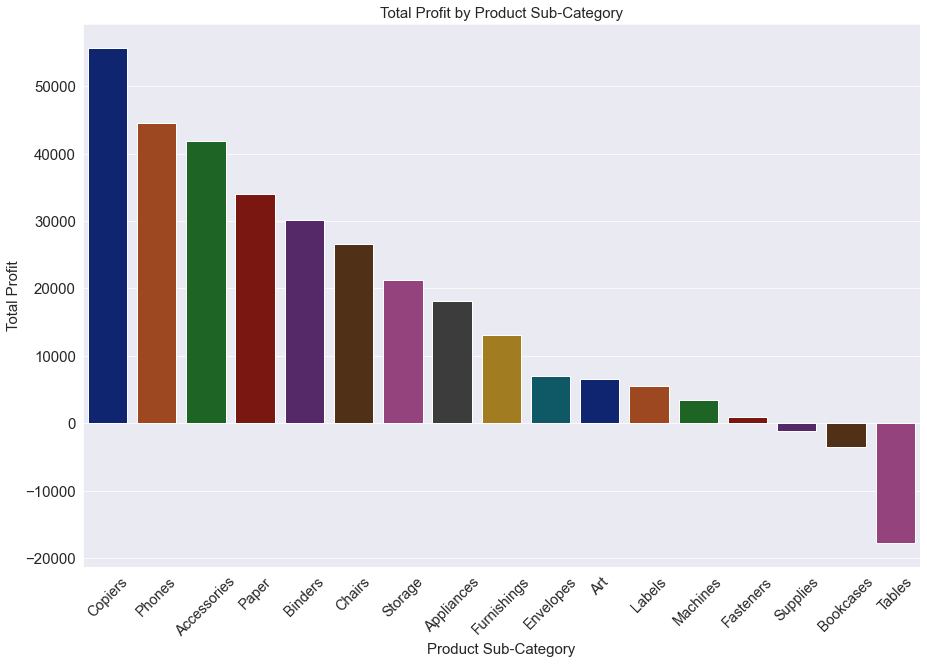

In [189]:
profits_subcategory = store.groupby('Sub-Category').Profit.sum().sort_values(ascending = False).reset_index()

sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Sub-Category', y = 'Profit',palette = 'dark', data= profits_subcategory)

ax.set_xlabel('Product Sub-Category', fontdict = {'size': 15})
ax.set_ylabel("Total Profit", fontdict = {'size': 15})
ax.set_title("Total Profit by Product Sub-Category", fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=45, 
    fontweight='light',
    fontsize='x-large'  
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Phones'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Storage'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Binders'),
  Text(5, 0, 'Machines'),
  Text(6, 0, 'Accessories'),
  Text(7, 0, 'Copiers'),
  Text(8, 0, 'Bookcases'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Furnishings'),
  Text(11, 0, 'Paper'),
  Text(12, 0, 'Supplies'),
  Text(13, 0, 'Art'),
  Text(14, 0, 'Envelopes'),
  Text(15, 0, 'Labels'),
  Text(16, 0, 'Fasteners')])

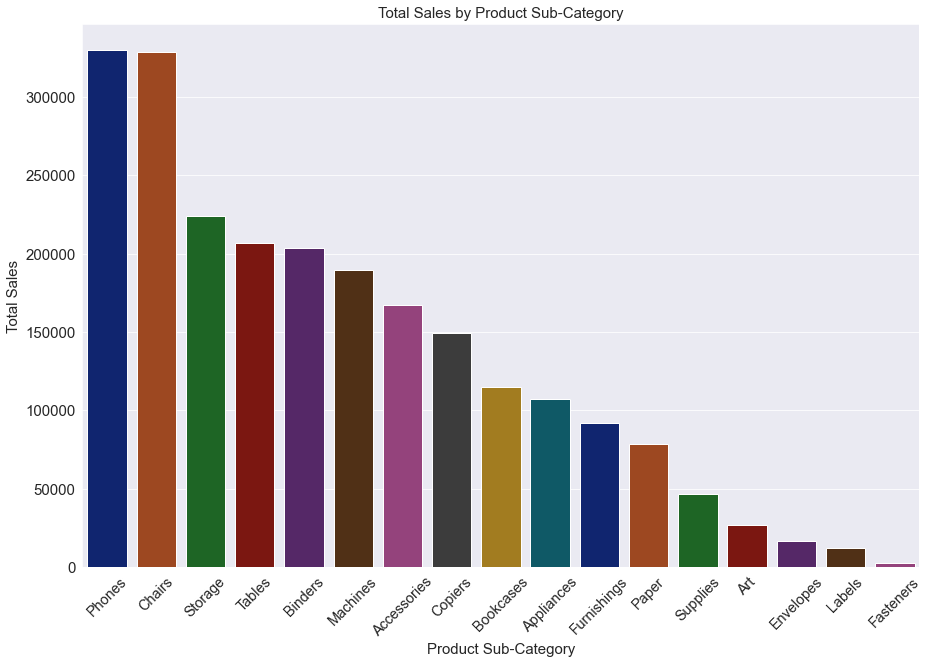

In [194]:
sales_subcategory = store.groupby('Sub-Category').Sales.sum().sort_values(ascending = False).reset_index()

sns.set_style('darkgrid')
plt.figure(figsize = (15,10))

ax = sns.barplot(x = 'Sub-Category', y = 'Sales',palette = 'dark', data= sales_subcategory)

ax.set_xlabel('Product Sub-Category', fontdict = {'size': 15})
ax.set_ylabel("Total Sales", fontdict = {'size': 15})
ax.set_title("Total Sales by Product Sub-Category", fontdict = {'size': 15})
ax.tick_params(axis = 'both', labelsize= 15)
plt.xticks(
    rotation=45, 
    fontweight='light',
    fontsize='x-large'  
)

In [178]:
sales_profits_orderdate = store[['Order Date', 'Sales', 'Profit']].sort_values('Order Date').reset_index(drop = True)
sales_profits_orderdate = sales_profits_orderdate.groupby('Order Date').mean()



,Order Date,Sales,Profit
0,2014-01-03,16.448,5.5512
1,2014-01-04,11.784,4.2717
2,2014-01-04,272.736,-64.7748
3,2014-01-04,3.540,-5.4870
4,2014-01-05,19.536,4.8840
...,...,...,...
9989,2017-12-30,3.024,-0.6048
9990,2017-12-30,52.776,19.7910
9991,2017-12-30,90.930,2.7279
9992,2017-12-30,13.904,4.5188


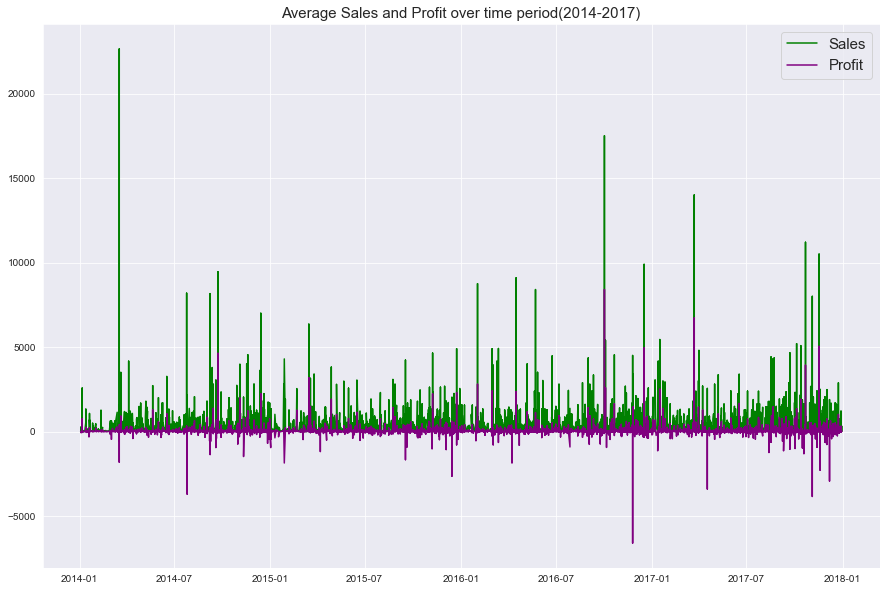

In [185]:
plt.figure(figsize = [15,10])

plt.plot('Order Date', 'Sales', data = sales_profits_orderdate, color = 'green' )

plt.plot('Order Date', 'Profit', data = sales_profits_orderdate, color = 'purple' )

plt.title('Average Sales and Profit over time period(2014-2017)', size = 15)

plt.legend(['Sales', 'Profit'], loc= 0, fontsize = 15)

plt.show()

## Final Findings:

1. Most profits come from the regions and from states
2. Highest sales from regions and states
3. The product category of Technology has the highest sales and profits in which product sub-category phones have the highest sales whereas copiers and phones yield the highest profits. Tables yielded negative profits.
4. Sales and profits increased over the years.
5. Highest number of sales happen in the months of September, November and December.



Next steps to be done:

predict future profits through machine learning

